In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn import cross_validation, metrics
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plote

%matplotlib inline

plt.style.use('ggplot')



/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv("../input/bank.csv")


In [3]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [5]:
train.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [7]:
list(set(train.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

## function for inding missing values in dataset

In [8]:
# To check how many columns have missing values - this can be repeated to see the progress made
def show_missing():
    missing = train.columns[train.isnull().any()].tolist()
    return missing

In [9]:
train[show_missing()].isnull().sum()

Series([], dtype: float64)

### this shows that there is no any missing data

# Correlation in Data

In [10]:

corr=train.corr()["y"]
corr[np.argsort(corr, axis=0)[::-1]]

y                 1.000000
duration          0.405274
previous          0.230181
cons_conf_idx     0.054878
age               0.030399
campaign         -0.066357
cons_price_idx   -0.136211
emp_var_rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr_employed      -0.354678
Name: y, dtype: float64

# VISUALIZATION

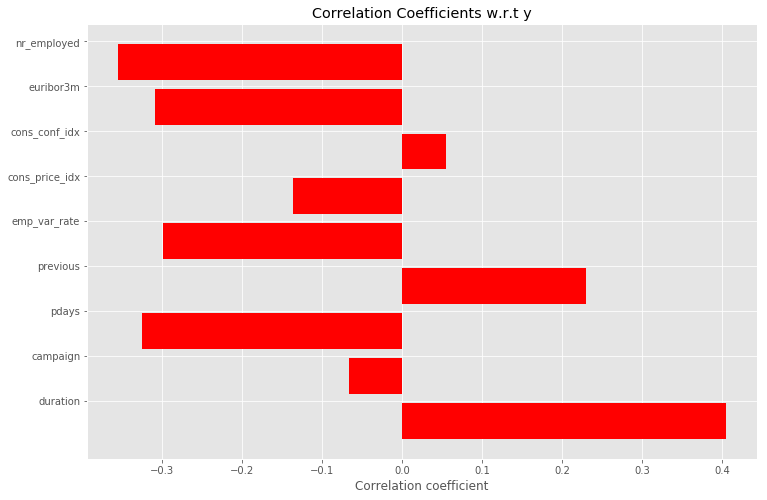

In [11]:
#plotting correlations
num_feat=train.columns[train.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.y.values)[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t y");

### Heat map

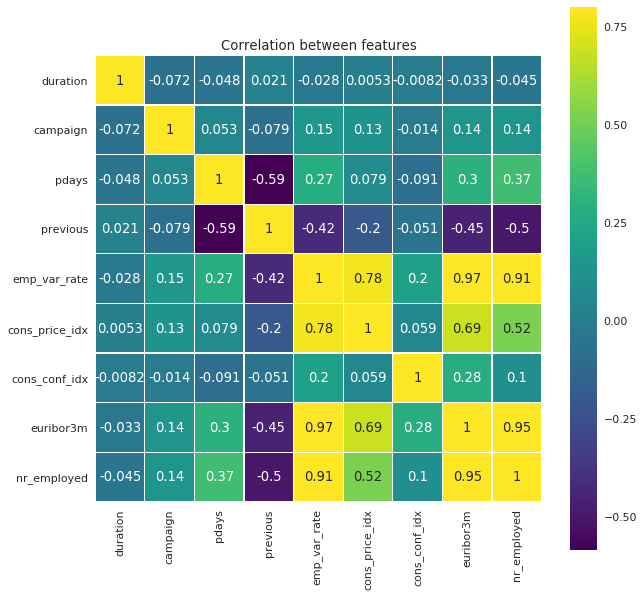

In [12]:
corrMatrix=train[num_feat].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

the above correlation plot shows that cons_conf_idx,previous,duration causing y=1 and the others causing y =0

## above shows the correlation of data wrt y ie how much these columns affecting the y

In [13]:
#sns.pairplot(train)

finging age distribution

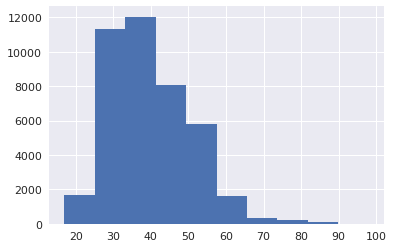

In [14]:
plt.hist(train.age,bins=10)
plt.show()

this shows that the coustomer between 25 to 40 is more likely to subscribe the bank

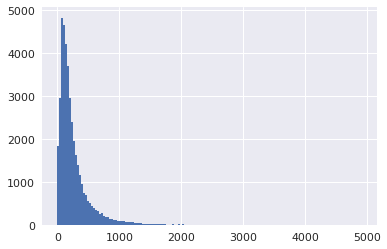

In [15]:
plt.hist((train.duration),bins=152)
plt.show()

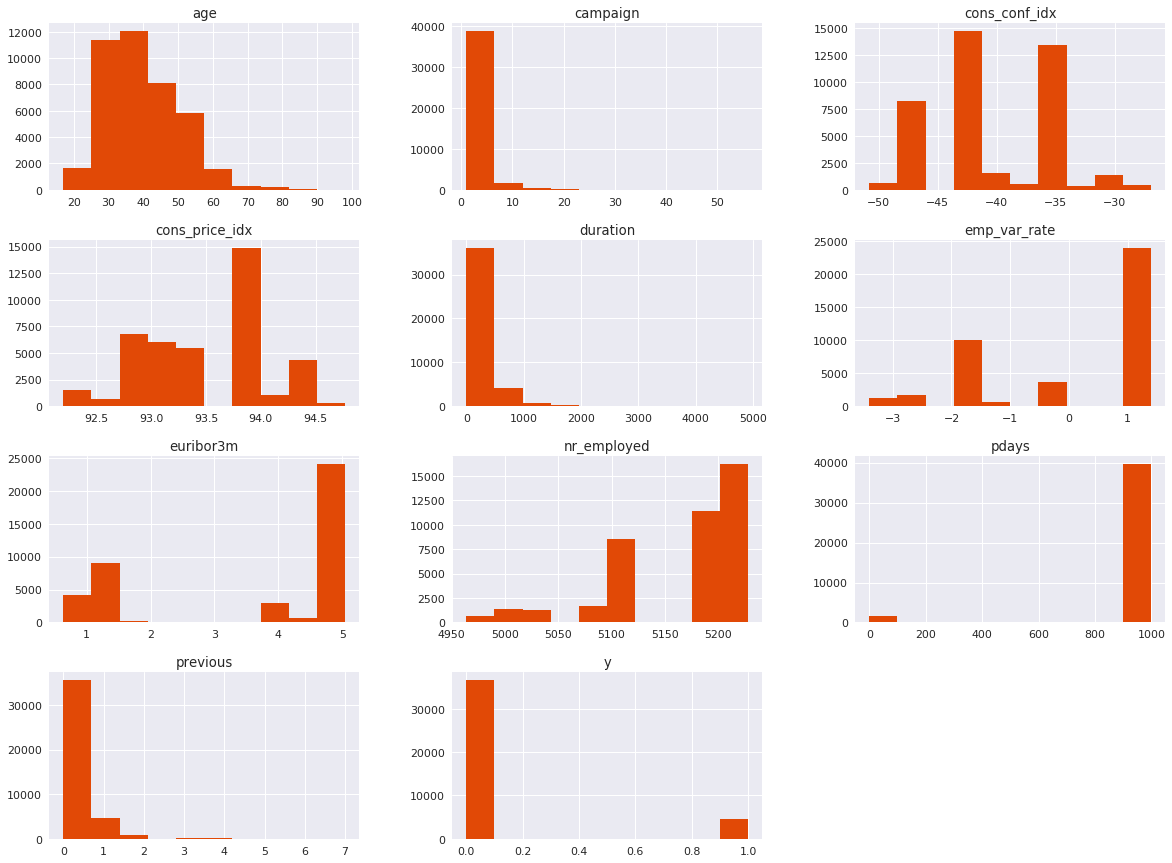

In [16]:
# Let's see how the numeric data is distributed.

train.hist(bins=10, figsize=(20,15), color='#E14906')
plt.show()

### this plot shows relation between y and durations

Text(0,0.5,'mean durations')

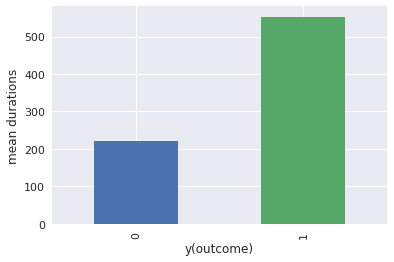

In [17]:
ax = train.groupby('y').duration.mean().plot(kind='bar')
ax.set_xlabel("y(outcome)")
ax.set_ylabel("mean durations")

                                                                           this shows that average duration for not subscribing is less than subscribing

### this plot shows relation between y and age

Text(0,0.5,'mean ages')

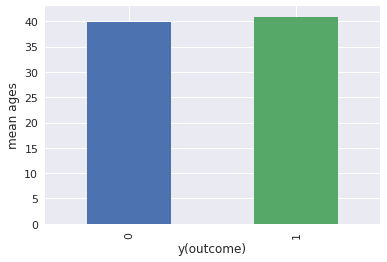

In [18]:
ax = train.groupby('y').age.mean().plot(kind='bar')
ax.set_xlabel("y(outcome)")
ax.set_ylabel("mean ages")

Text(0,0.5,'mean previous')

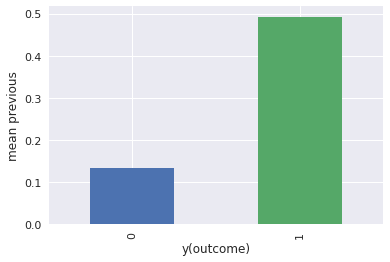

In [19]:
ax = train.groupby('y').previous.mean().plot(kind='bar')
ax.set_xlabel("y(outcome)")
ax.set_ylabel("mean previous")

In [20]:
# This is to create each of the categories.
lst = [train]
for column in lst:
    column.loc[column["age"] < 30,  "age_category"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_category"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_category"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_category"] = 50
    column.loc[column["age"] >= 60, "age_category"] = 60
 
train['age_category'] = train['age_category'].astype(np.int64)
train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
age_category        int64
dtype: object

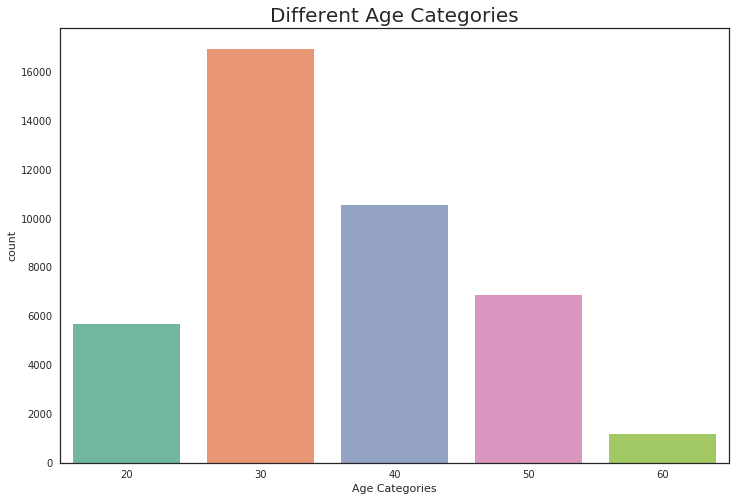

In [21]:
import seaborn as sns
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="age_category", data=train, palette="Set2")
ax.set_title("Different Age Categories", fontsize=20)
ax.set_xlabel("Age Categories")
plt.show()

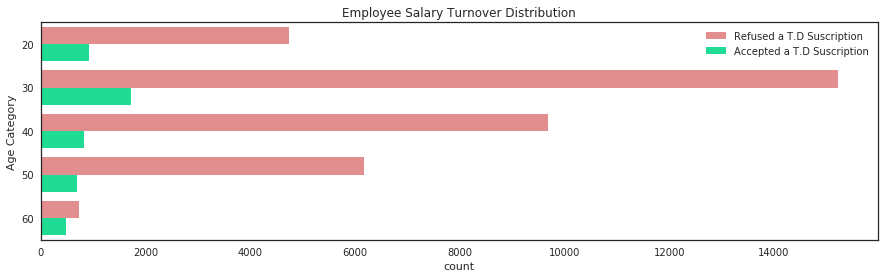

In [22]:
# There was a positive ratio of Suscribing Term Deposits  of people in their 20s (or younger) and 60s (or older)
sns.set(style="white")
fig, ax = plt.subplots(figsize=(15, 4))
colors = ["#F08080", "#00FA9A"]
labels = ['No Deposit', 'Deposit']
sns.countplot(y="age_category", hue='y', data=train, palette=colors).set_title('Employee Salary Turnover Distribution')
ax.set_ylabel("Age Category")
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused a T.D Suscription')
legend_name.get_texts()[1].set_text('Accepted a T.D Suscription')

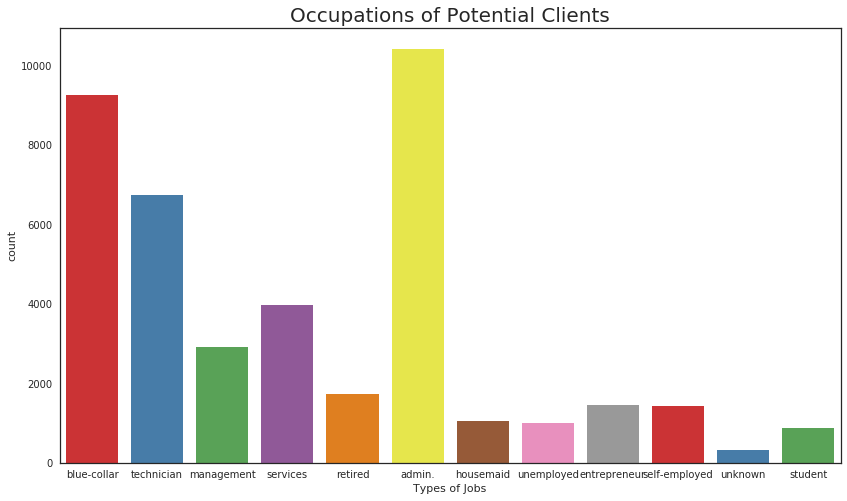

In [23]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(x="job", data=train, palette="Set1")
ax.set_title("Occupations of Potential Clients", fontsize=20)
ax.set_xlabel("Types of Jobs")
plt.show()

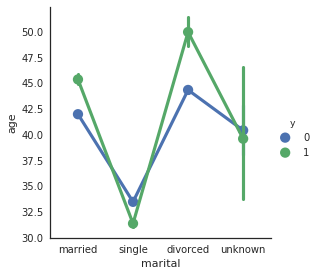

In [24]:
sns.factorplot('marital','age',hue='y',data=train )

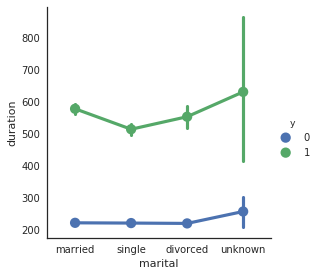

In [25]:
sns.factorplot('marital','duration',hue='y',data=train )

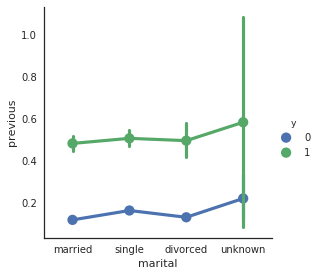

In [26]:
sns.factorplot('marital','previous',hue='y',data=train )

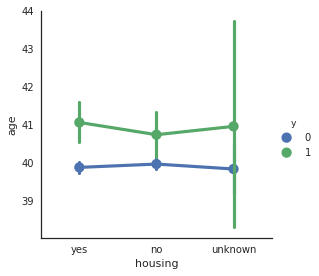

In [27]:
sns.factorplot('housing','age',hue='y',data=train )

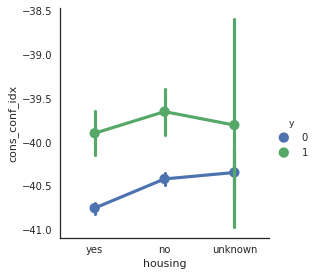

In [28]:
sns.factorplot('housing','cons_conf_idx',hue='y',data=train )

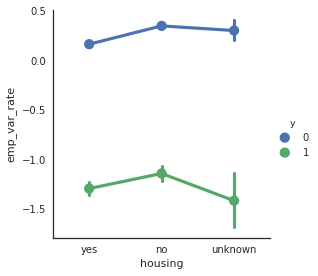

In [29]:
sns.factorplot('housing','emp_var_rate',hue='y',data=train )

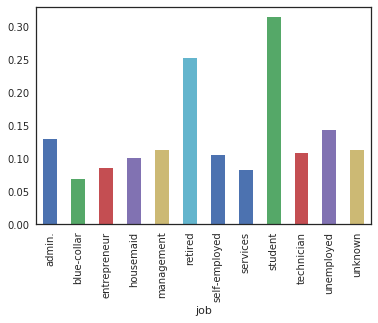

In [30]:
train.groupby('job').y.mean().plot(kind='bar')

### Above plot shows that the students and retired man are most likely to subscribe

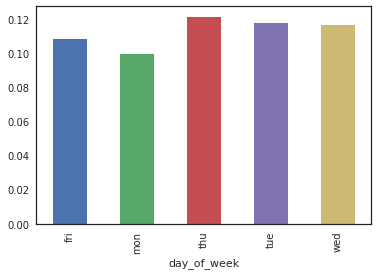

In [31]:
train.groupby('day_of_week').y.mean().plot(kind='bar')

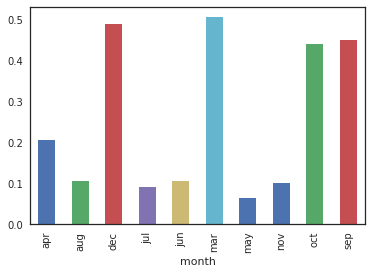

In [32]:
train.groupby('month').y.mean().plot(kind='bar')

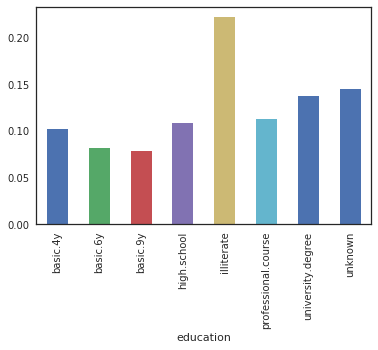

In [33]:
train.groupby('education').y.mean().plot(kind='bar')

### this shows that the illiterate person is more likely to subscribe

#  prediction through different algorithms

In [34]:
encoding_list = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome']
train[encoding_list] = train[encoding_list].apply(LabelEncoder().fit_transform)

### Splitting data set to train and test in 7:3 ratio 

In [35]:
Y = train['y']
X = train.drop('y', axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y ,test_size=0.3, random_state=2)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(28831, 21)
(12357, 21)
(28831,)
(12357,)


# Different Classification Models:

In [37]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [38]:
# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()
print(log_reg_mean)

0.9125248613280932


In [39]:
# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
print(knn_mean)

0.9044084747873463


In [40]:
# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()
print(tree_mean)

0.889077720547171


In [41]:
# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()
print(grad_mean)

0.9177970244798298


In [ ]:
# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()
print(rand_mean)

0.9113108300873595


In [ ]:
# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()
print(neural_mean)

In [ ]:
# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()
print(nav_mean)

## Clearly We can see that Gradient Boosting gives the best score